# Desafío Data Science Latam

## Importa librerías

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

## Carga archivo de datos

In [3]:
latamDF = pd.read_csv('dataset_SCL.csv', parse_dates=['Fecha-I','Fecha-O'])
latamDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha-I    68206 non-null  datetime64[ns]
 1   Vlo-I      68206 non-null  object        
 2   Ori-I      68206 non-null  object        
 3   Des-I      68206 non-null  object        
 4   Emp-I      68206 non-null  object        
 5   Fecha-O    68206 non-null  datetime64[ns]
 6   Vlo-O      68205 non-null  object        
 7   Ori-O      68206 non-null  object        
 8   Des-O      68206 non-null  object        
 9   Emp-O      68206 non-null  object        
 10  DIA        68206 non-null  int64         
 11  MES        68206 non-null  int64         
 12  AÑO        68206 non-null  int64         
 13  DIANOM     68206 non-null  object        
 14  TIPOVUELO  68206 non-null  object        
 15  OPERA      68206 non-null  object        
 16  SIGLAORI   68206 non-null  object       

C:\Users\an2fe\anaconda3v2\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Pregunta 1
### ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

Los datos estan claramente diferenciados entre programados y operado, lo cual facilita determinar cuáles vuelos se retrasaron. En ambos casos (programado y operado), se incluye información en la fecha y hora, número de vuelo, ciudades de origen y destino, y código de la aerolinea.

Adicionalmente se incluye columnas individuales para el dia, mes, y año en que los vuelos fueron operados. Inicialmente esta información parece redundante con la columna "Fecha-O". Adicionalmente se incluye el día de la semana, el cuál puede ser relevante para predecir el retraso de un vuelo.

Una columna con el tipo de vuelo (Nacional o Internacional), la cuál también puede ser de importancia para la predicción.

Finalmente, se tienen tres columnas con los nombres completos de la aerolinea operadora, ciudad de origen y ciudad de destino. Esta información es redundante con las columnas "Ori-O", "Des-O", "Emp-O".  

A continuación se realizará una exploración de los datos para conocer más en detalle la distribución de los datos en el tiempo.

In [6]:
#Agrupa los vuelos por año
latamDF.groupby(latamDF['Fecha-O'].dt.year).count()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
Fecha-O,,,,,,,,,,,,,,,,,,
2017,68204,68204,68204,68204,68204,68204,68203,68204,68204,68204,68204,68204,68204,68204,68204,68204,68204,68204
2018,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


La gran mayoría de los vuelos incluidos en el dataset son del 2017, por lo cual el año será irrelevante para el análisis

In [7]:
#Muestra los 2 vuelos del 2018
latamDF[latamDF['Fecha-O'].dt.year==2018]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
66918,2017-12-31 23:55:00,602,SCEL,KLAX,LAN,2018-01-01 00:02:00,602.0,SCEL,KLAX,LAN,1,1,2018,Lunes,I,Grupo LATAM,Santiago,Los Angeles
66947,2017-12-31 23:40:00,622,SCEL,MMMX,LAN,2018-01-01 00:12:00,622.0,SCEL,MMMX,LAN,1,1,2018,Lunes,I,Grupo LATAM,Santiago,Ciudad de Mexico


Los 2 vuelos operados en el 2018 fueron vuelos programados para el 31 de Diciembre del 2017 cercanos a la medianoche, y se retrasaron lo suficiente como para ser operados en el 2018.

In [20]:
#Visualiza la distribución de los vuelos en el año, por mes y día
latamDF.groupby(pd.Grouper(key='Fecha-I',freq='1D')).count()

,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
Fecha-I,,,,,,,,,,,,,,,,,
2017-01-01,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170
2017-01-02,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198
2017-01-03,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195
2017-01-04,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193
2017-01-05,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217
2017-12-28,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213
2017-12-29,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220


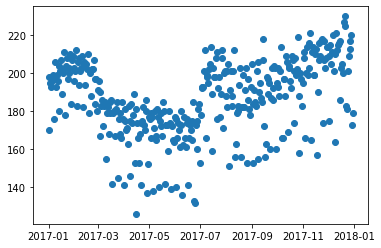

In [31]:
countMD = latamDF.groupby(pd.Grouper(key='Fecha-I',freq='1D')).count()
plt.scatter(countMD.index,countMD['Fecha-O'])
#ax = countMD.plot()
#plt.show()

Se nota un claro decrecimiento e